In [2]:
!pip install music21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 9.5 MB/s eta 0:00:0000:0100:01m


In [3]:
import os
from music21 import converter, note, chord, stream
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [4]:
ABC_DIR = '/Users/ishitachawla/Documents/CSE253/Assignment_2/nottingham-dataset/ABC_cleaned'  # Replace with your actual path


In [5]:
# Initialize counters for various musical features
pitch_counter = Counter()
duration_counter = Counter()
key_counter = Counter()
time_signature_counter = Counter()

# Process each ABC file in the directory
for filename in os.listdir(ABC_DIR):
    if filename.endswith('.abc'):
        file_path = os.path.join(ABC_DIR, filename)
        try:
            # Parse the ABC file using music21
            score = converter.parse(file_path)
            
            # Extract key signature
            key = score.analyze('key')
            key_counter[str(key)] += 1
            
            # Extract time signature
            ts = score.recurse().getElementsByClass('TimeSignature')
            if ts:
                time_signature_counter[str(ts[0])] += 1
            
            # Iterate through all notes and chords in the score
            for element in score.recurse().notes:
                if isinstance(element, note.Note):
                    pitch_counter[element.pitch.nameWithOctave] += 1
                    duration_counter[element.quarterLength] += 1
                elif isinstance(element, chord.Chord):
                    for n in element.notes:
                        pitch_counter[n.pitch.nameWithOctave] += 1
                        duration_counter[n.quarterLength] += 1
        except Exception as e:
            print(f"Error processing {filename}: {e}")



In [6]:
# Function to plot a bar chart for a given counter
def plot_counter(counter, title, xlabel, ylabel, top_n=20):
    most_common = counter.most_common(top_n)
    items = [item[0] for item in most_common]
    counts = [item[1] for item in most_common]
    plt.figure(figsize=(12, 6))
    sns.barplot(x=items, y=counts, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


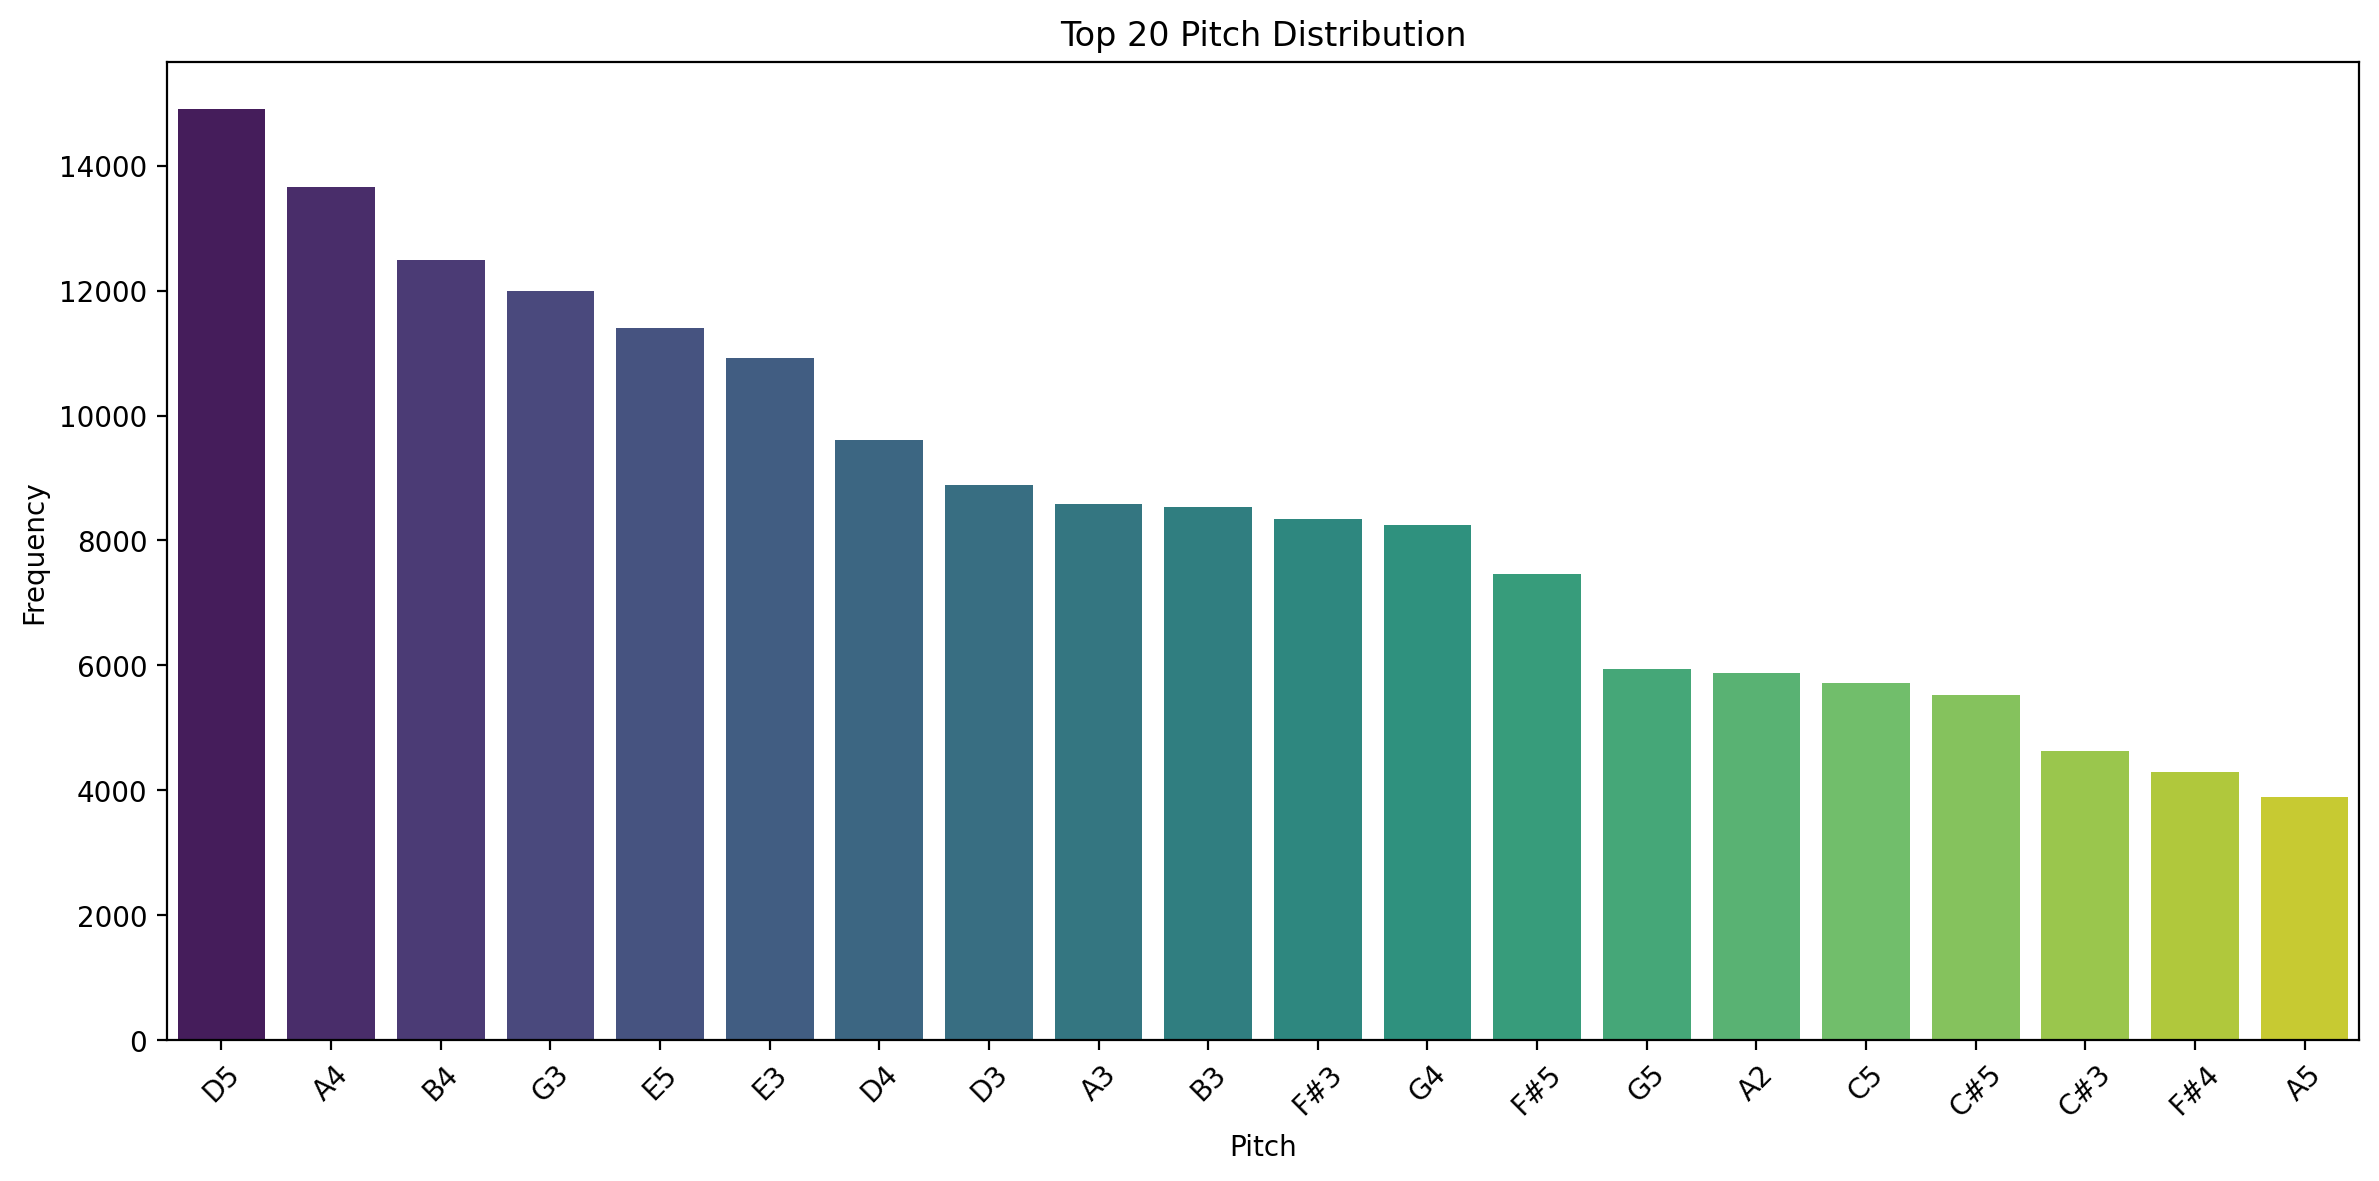

/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


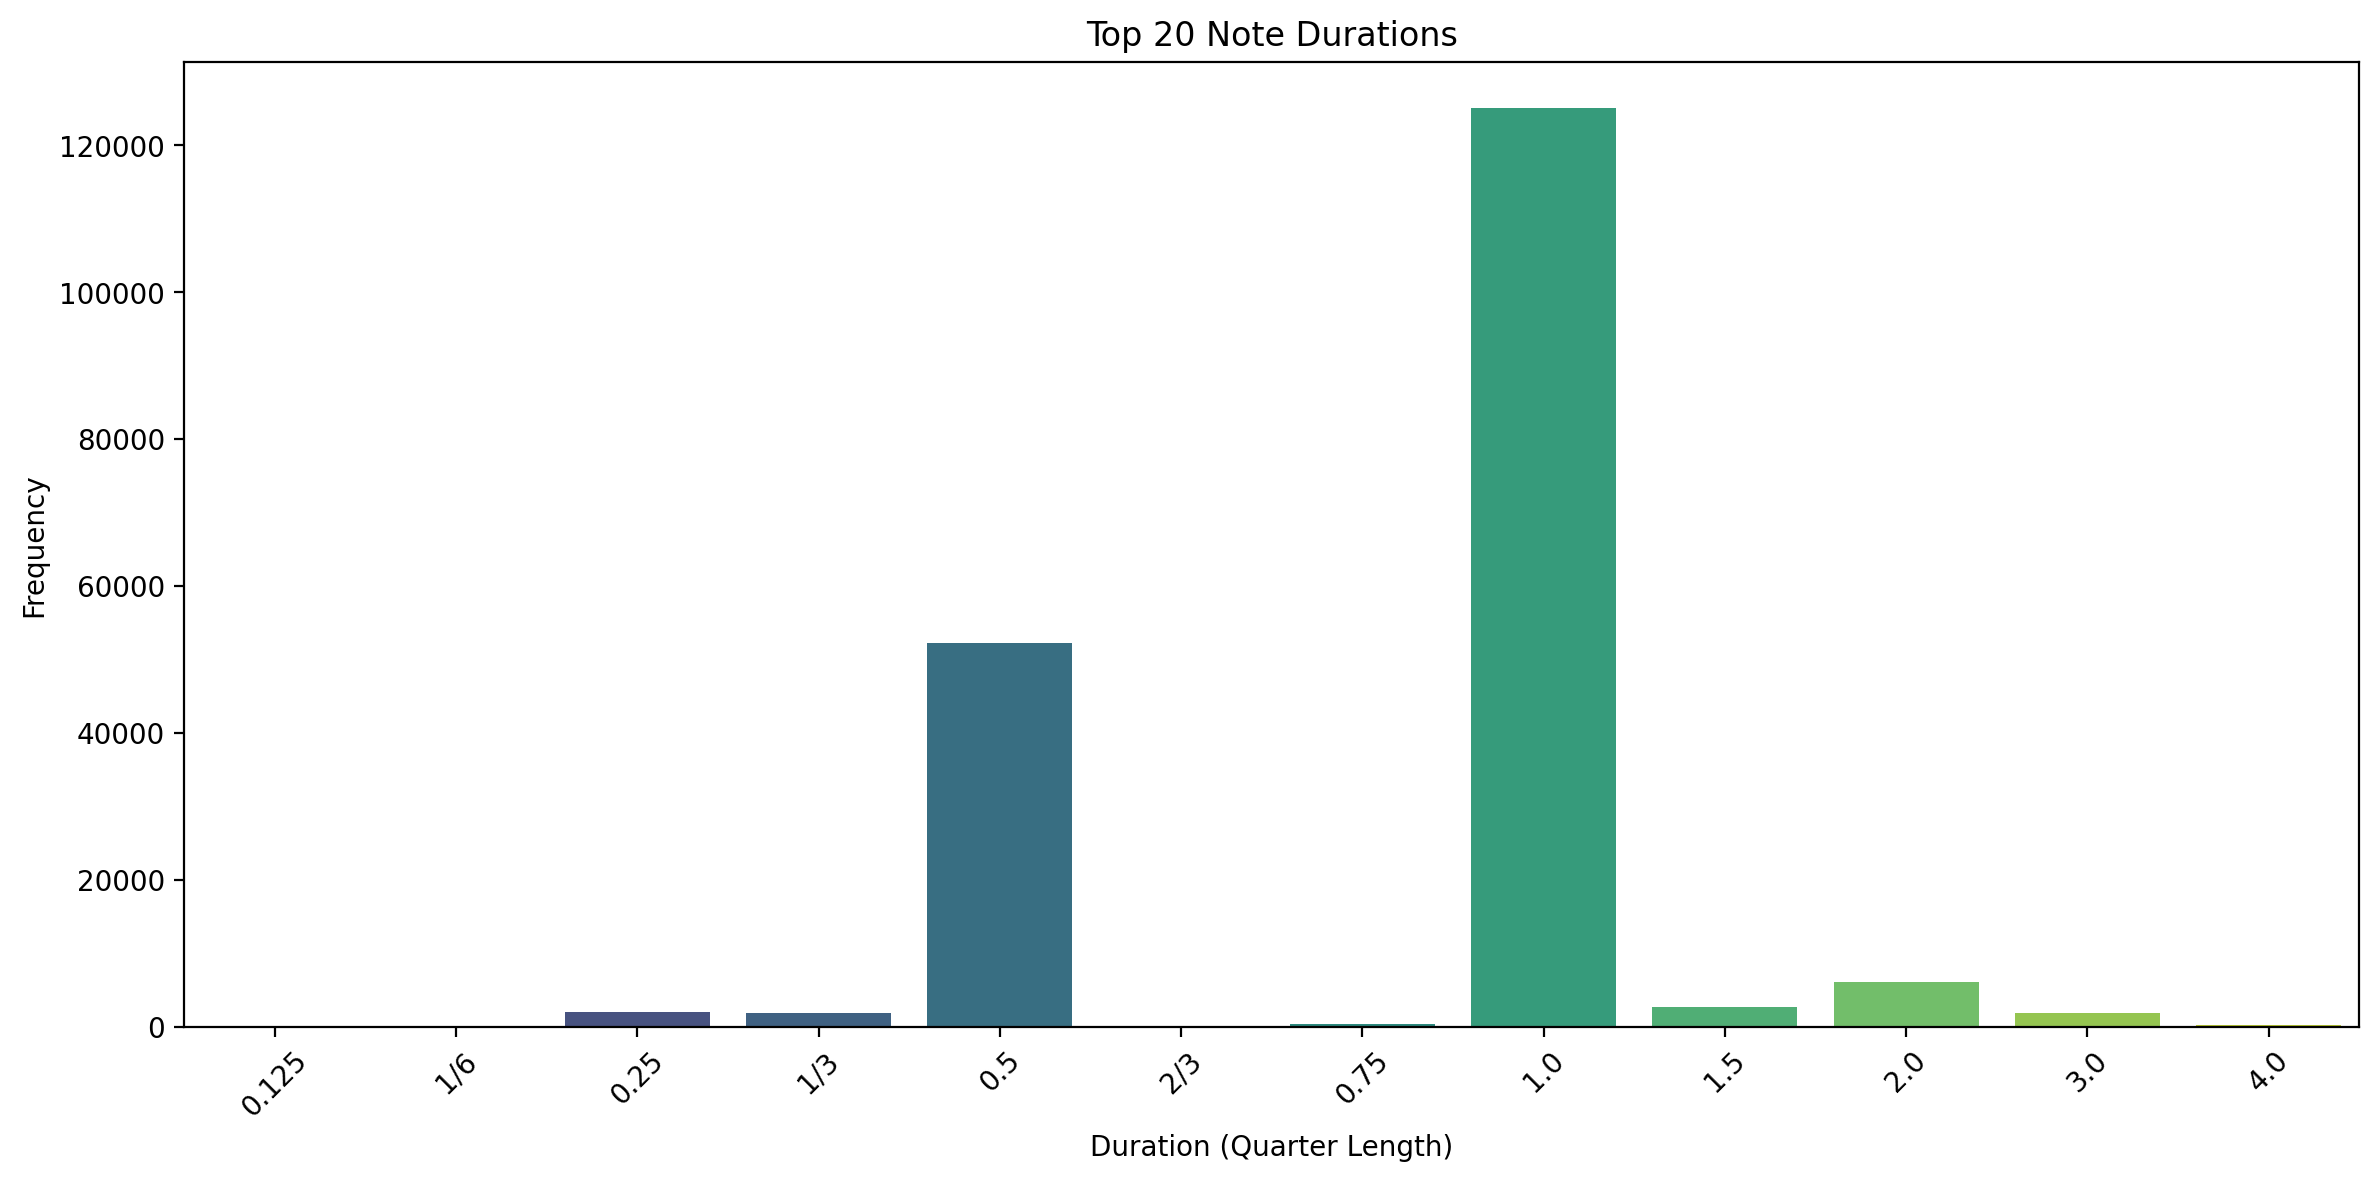

/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


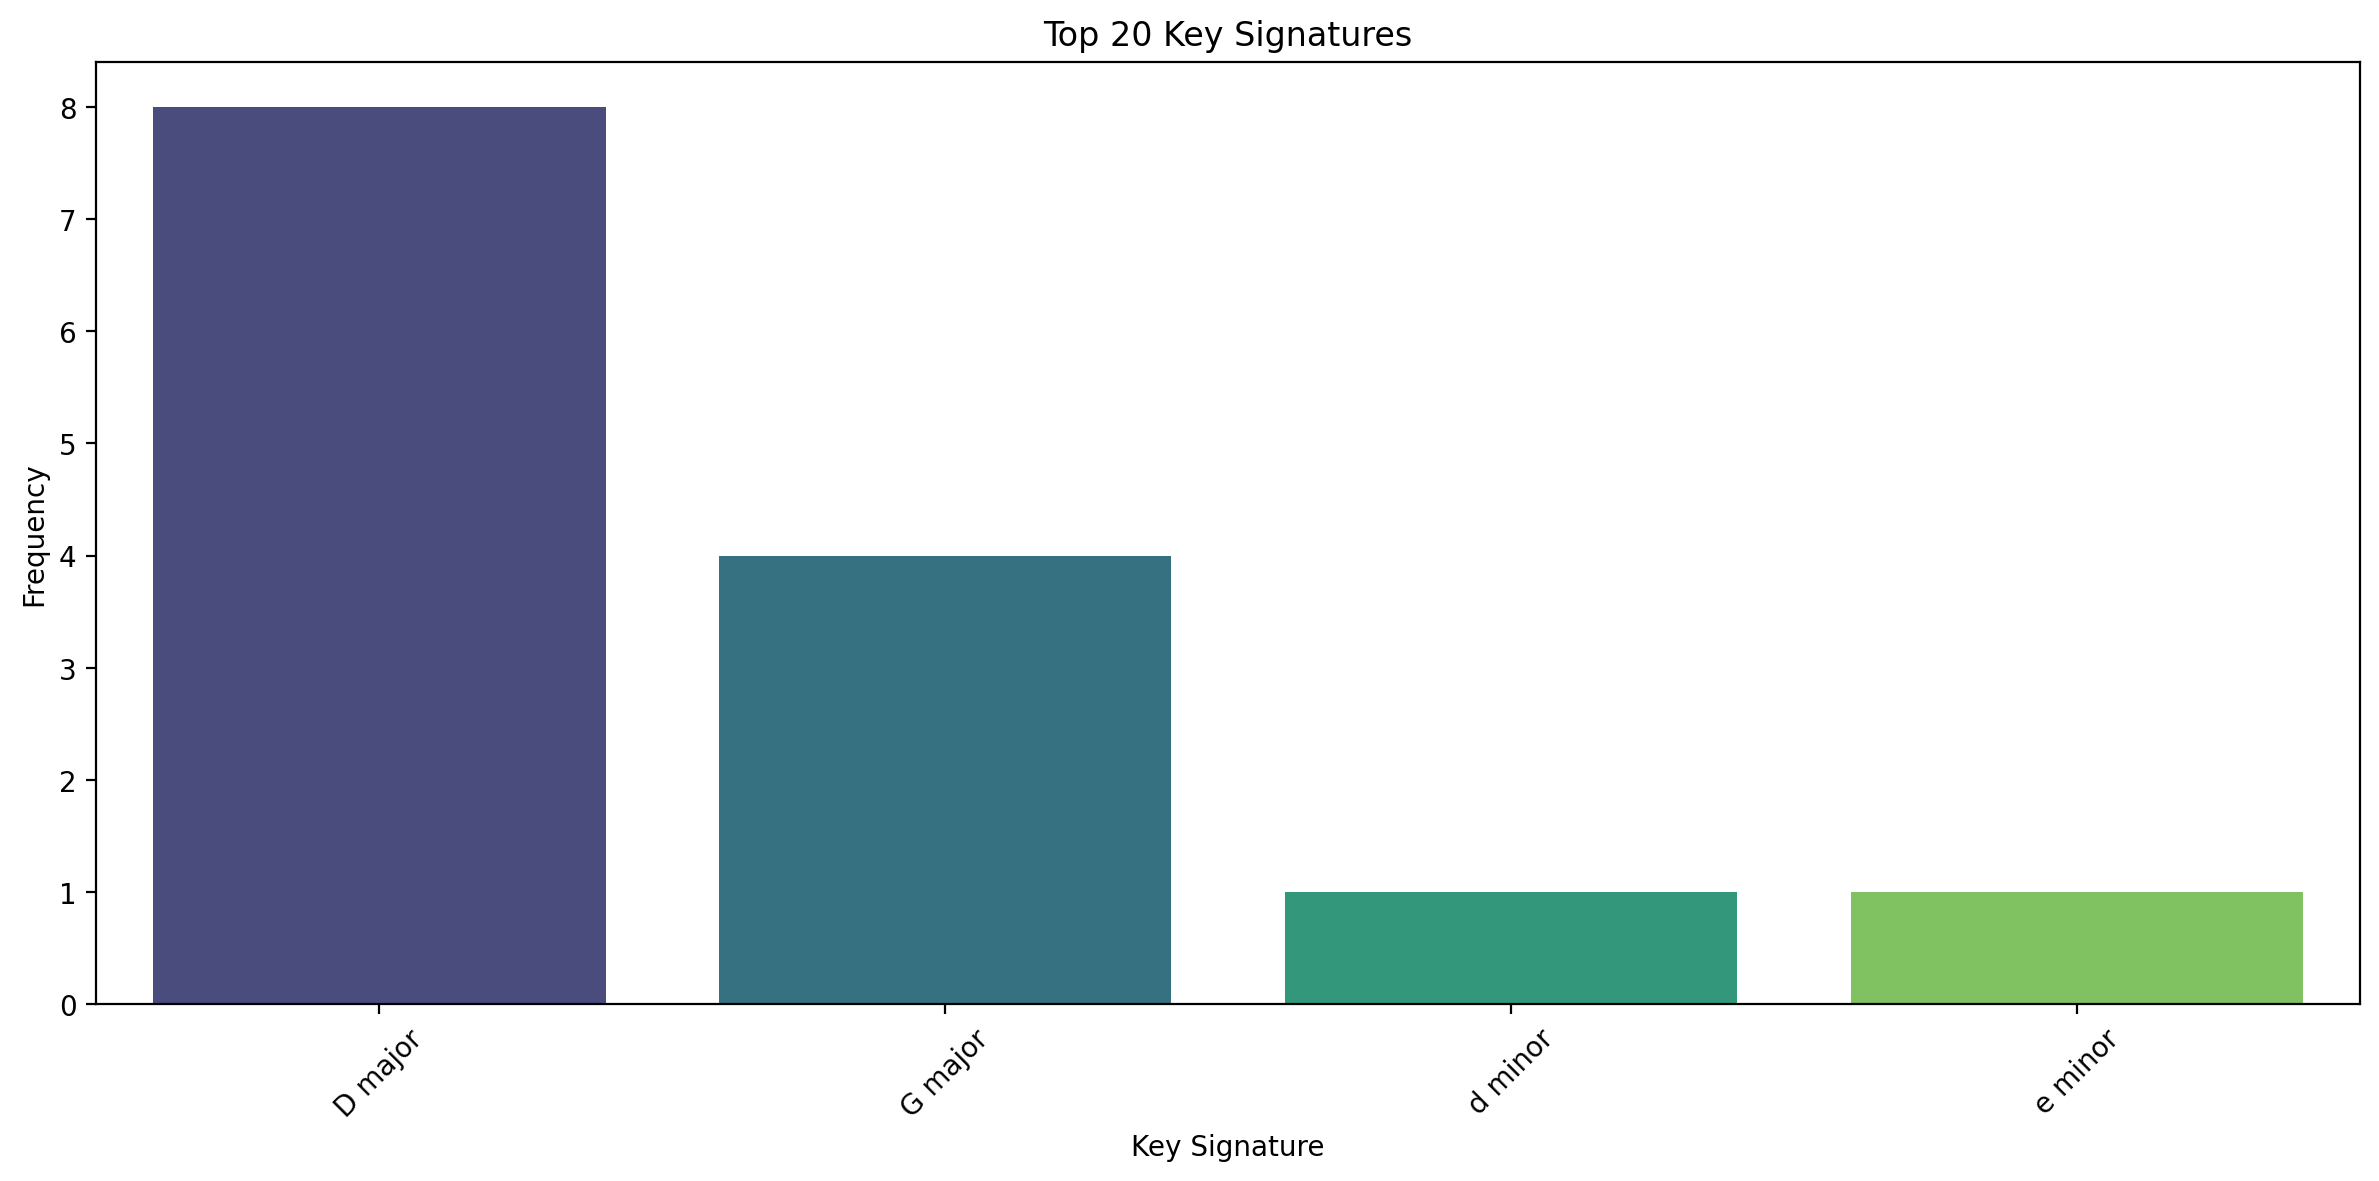

/var/folders/4c/4vrvxs3d2bz5qpr6t3nbv3gr0000gn/T/ipykernel_91472/3901565449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=counts, palette='viridis')


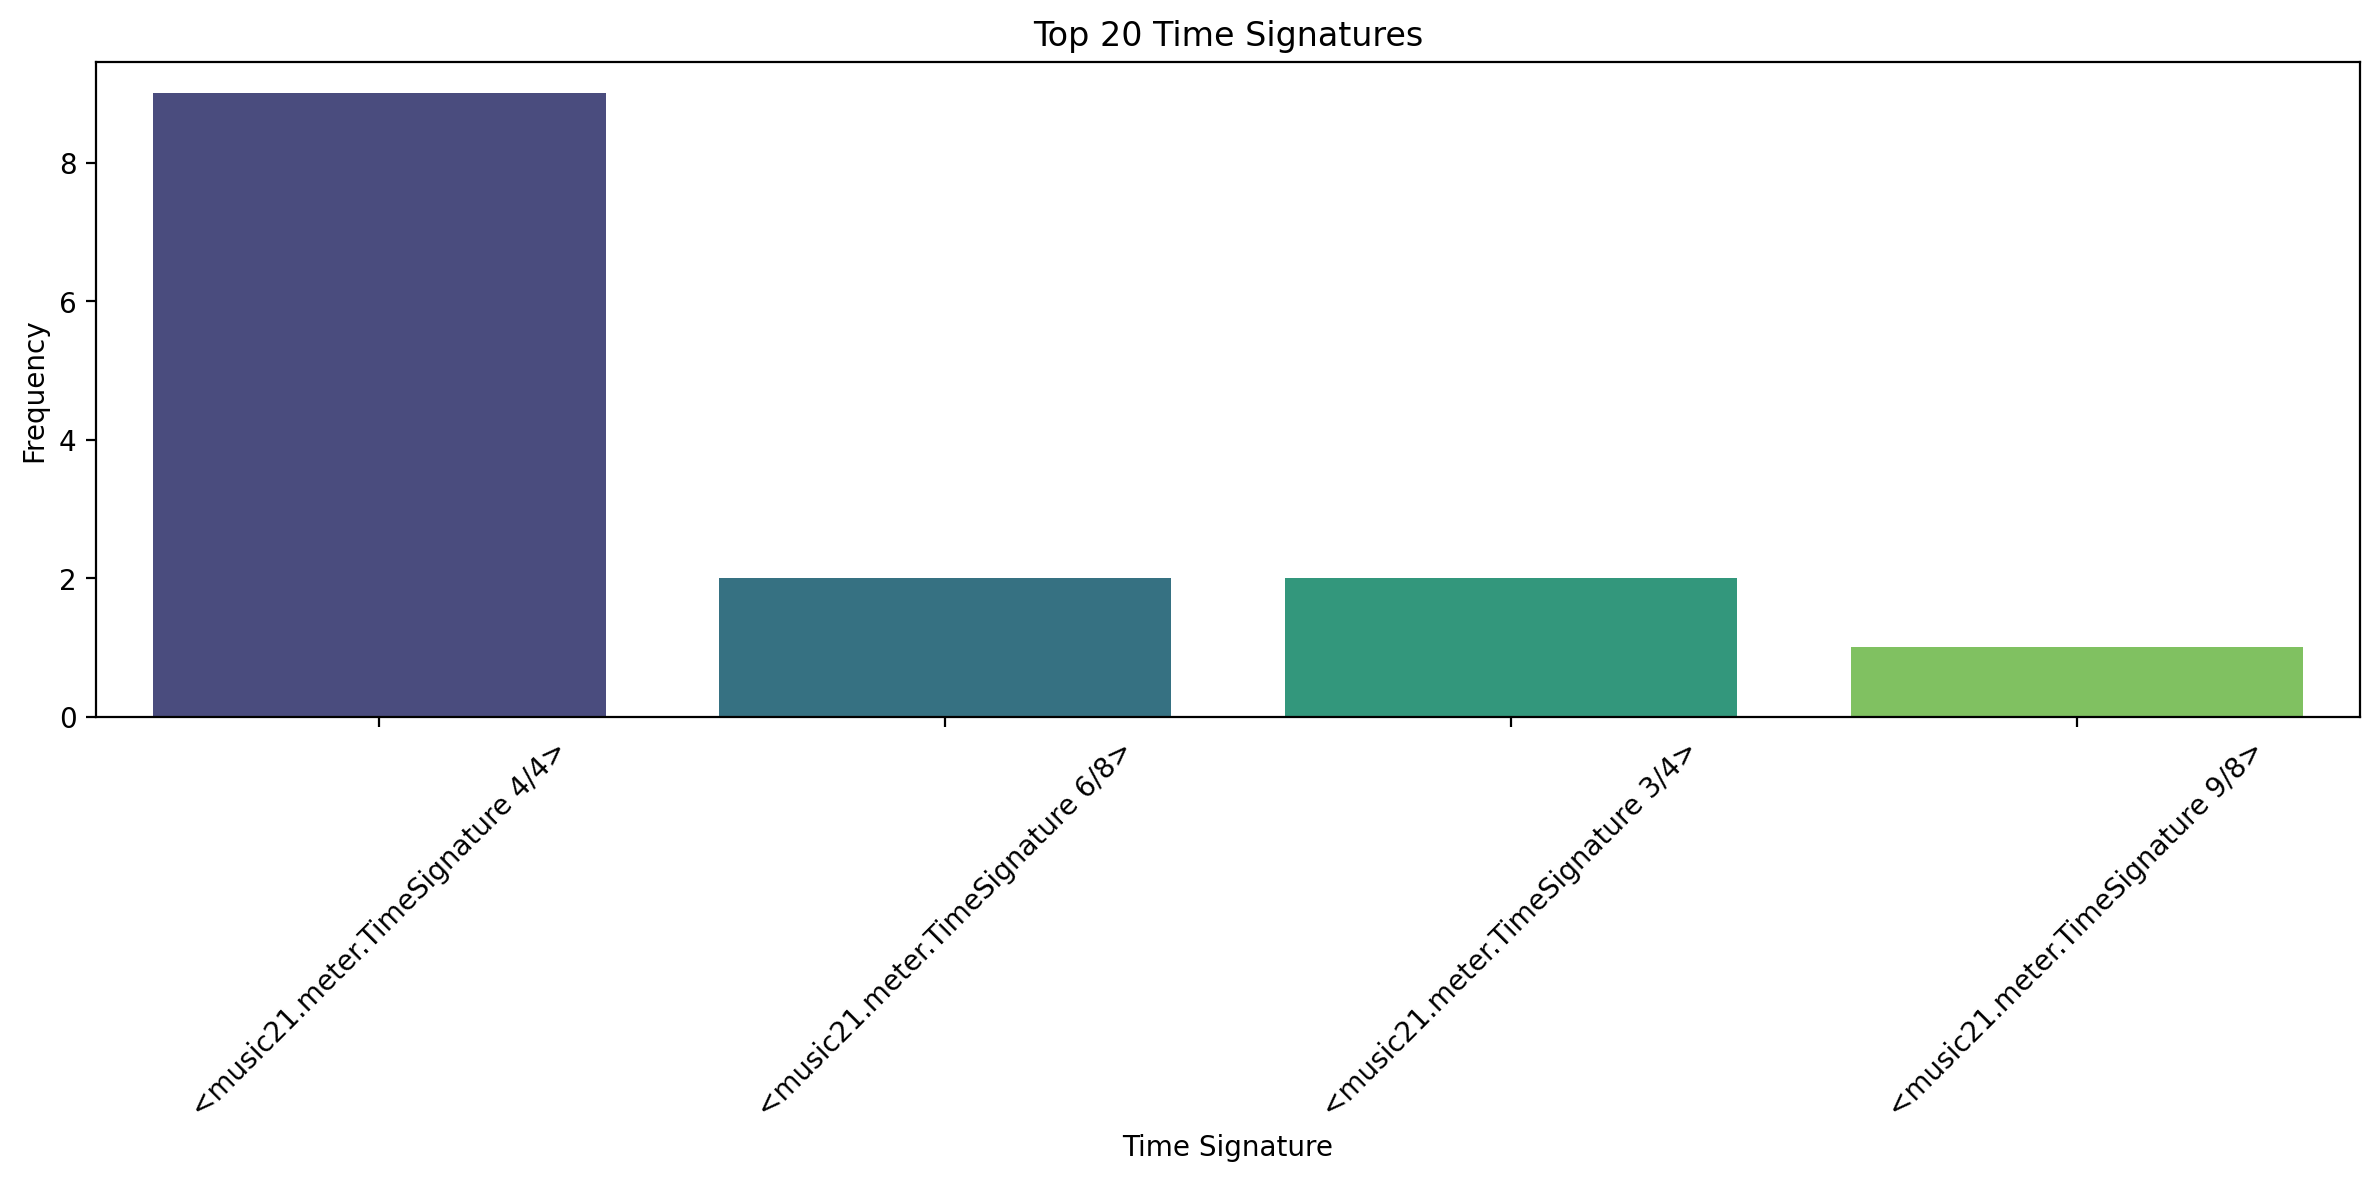

In [7]:
# Plot pitch distribution
plot_counter(pitch_counter, 'Top 20 Pitch Distribution', 'Pitch', 'Frequency')

# Plot note duration distribution
plot_counter(duration_counter, 'Top 20 Note Durations', 'Duration (Quarter Length)', 'Frequency')

# Plot key signature distribution
plot_counter(key_counter, 'Top 20 Key Signatures', 'Key Signature', 'Frequency')

# Plot time signature distribution
plot_counter(time_signature_counter, 'Top 20 Time Signatures', 'Time Signature', 'Frequency')
